### Исследование объявлений о продаже квартир <a name="step6"></a>

#### Задача: 
Исследуя архив объявлений о продаже квартир в Санкт-Петербурге, установить параметры от которых зависит цена и степень зависимости.

#### План работы:
1. [Изучение общей информации данных.](#step1)
2. [Предобработка данных. Обработка пропущенных значений, выявление дубликатов, приведение данных к нужным типам.](#step2)
3. [Добавление в таблицу новых столбцов:](#step3)
    + Цена квадратного метра.
    + Дата публикации объявления.
    + Этаж (первый/последний/другой).
    + Соотношение жилой и общей площади.
    + Соотношение кухни и общей площади.
4. [Анализ данных.](#step4)
    + [Исследование общей площади квартир.](#total_area)
    + [Исследование цены квартир.](#price)
    + [Исследование количества комнат.](#rooms)
    + [Исследование высоты потолков.](#ceiling_height)
    + [Исследование количества дней размещения.](#days_exposition)
    + [Исследование зависимости цены от общей площади, количества комнат и удалённости от центра.](#price_square_rooms_center)
    + [Исследование зависимости цены от этажа.](#price_floor)
    + [Исследование зависимости цены от дня размещения объявления.](#price_weekday)
    + [Исследование зависимости цены от города, в котором продавалась квартира.](#price_locality)
    + [Исследование квартир в Санкт-Петербурге, определение зоны центра города.](#price_center)
    + [Сравнение объявлений о продаже квартир в центре Санкт-Петербурга и за пределами центра.](#spb_center)
5. [Вывод.](#step5)

### Шаг 1. Открытие файла с данными и изучение общей информации <a name="step1"></a>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [5]:
df.sample(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
28,8,4170000.0,44.00,2017-12-13T00:00:00,1,2.90,6.0,20.8,1,NaN,...,11.7,1.0,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,74.0
18875,15,8500000.0,75.90,2018-09-02T00:00:00,3,2.50,9.0,44.1,8,False,...,8.9,1.0,Санкт-Петербург,9774.0,10315.0,1.0,466.0,0.0,NaN,71.0
20795,10,2400000.0,43.00,2017-12-07T00:00:00,1,3.00,16.0,20.0,13,NaN,...,11.0,NaN,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,143.0
11652,16,4700000.0,51.00,2016-06-07T00:00:00,2,2.60,5.0,30.0,1,NaN,...,8.0,NaN,Санкт-Петербург,14072.0,28644.0,0.0,NaN,0.0,NaN,539.0
4733,20,2150000.0,52.40,2017-11-09T00:00:00,2,2.62,9.0,27.5,7,NaN,...,10.0,2.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,132.0
4235,15,9000000.0,57.80,2019-04-03T00:00:00,2,3.10,7.0,37.3,7,NaN,...,8.3,NaN,Санкт-Петербург,11601.0,8504.0,1.0,359.0,3.0,617.0,5.0
15082,9,2300000.0,32.00,2017-04-18T00:00:00,1,2.55,9.0,19.0,1,NaN,...,5.0,0.0,Красное Село,27741.0,31165.0,0.0,NaN,0.0,NaN,185.0
20589,4,6500000.0,75.00,2016-02-08T00:00:00,3,NaN,9.0,45.3,2,False,...,9.0,0.0,Санкт-Петербург,28011.0,12534.0,1.0,549.0,1.0,53.0,162.0
20534,18,3600000.0,31.23,2016-04-13T00:00:00,1,2.80,23.0,15.0,11,True,...,10.0,2.0,Санкт-Петербург,33705.0,14883.0,0.0,NaN,0.0,NaN,767.0
5309,6,7450000.0,61.20,2017-11-29T00:00:00,3,2.50,9.0,42.7,1,NaN,...,6.4,2.0,Санкт-Петербург,17237.0,12011.0,0.0,NaN,0.0,NaN,173.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Названия столбцов:
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition - дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000— число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

### Вывод

Итак, всего в датафрейме 23699 строк и 22 столбца. Изучим информацию по столбцам:
- total_images: на первый взгляд, с этим столбцом всё в порядке
- last_price: этот столбец можно перевести в целочисленному типу
- total_area: на первый взгляд, всё в порядке
- first_day_exposition: задать столбце типа datetime
- rooms: на первый взгляд всё в порядке
- ceiling_height: много пропущенных значений. Так как, эти значения могут повлиять на наши выводы, нужно выбрать способ замены пропущенных значений и заменить их
- floors_total: перевести в целочисленный тип и изучить пропуски
- living_area: изучить пропуски
- floor: на первый взгляд, всё в порядке
- is_apartment: перевести в булев тип и изучить пропуски
- studio: на первый взгляд, всё в порядке
- open_plan: на первый взгляд, всё в порядке
- kitchen_area: изучить пропуски
- balcony: изучить пропуски, перевести в целочисленный тип
- locality_name: изучить пропуски и значения. Возможно, в данных присутствуют одинаковые населённые пункты, названные по-разному
- airports_nearest: изучить пропуски
- cityCenters_nearest: изучить пропуски
- parks_around3000: изучить пропуски, перевести в целочисленный тип
- parks_nearest: изучить пропуски
- ponds_around3000: изучить пропуски, перевести в целочисленный тип
- ponds_nearest: изучить пропуски
- days_exposition: изучить пропуски, перевести в целочисленный тип

[В начало](#step6)

### Шаг 2. Предобработка данных <a name="step2"></a>

In [7]:
df['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

Этот столбец обрабатывать не надо

In [8]:
df['last_price'] = df['last_price'].astype('int')
df['last_price'].dtype

dtype('int32')

In [9]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

75% квартир площадью до 70 кв.м - нормальный показатель. Вроде бы, ничего подозрительного, но хочется изучить, насколько реальные данные объявлений с очень большой общей площадью

In [10]:
df.query('total_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000,483.90,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.40,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
3117,19,140000000,631.00,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3676,12,28789000,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000,517.00,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.00,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
5893,3,230000000,500.00,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
6221,8,34000000,470.30,2018-01-14T00:00:00,4,NaN,3.0,248.7,3,NaN,...,40.00,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000,488.00,2017-04-09T00:00:00,5,2.95,20.0,216.0,17,NaN,...,50.00,NaN,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
8018,20,84000000,507.00,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.50,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
9826,1,43185328,494.10,2017-05-12T00:00:00,1,2.85,12.0,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0


Вполне реалистичные данные.

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # переводим столбец в формат datetime
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Со столбцом всё в порядке.

Скорее всего, пропуски в столбцах 'locality_name' и 'floors_total' появились в результате ошибок при заполнении объявлений. Так как количество таких объявлений составляет менее 0,6%, эти строки удаляю.

In [13]:
df.dropna(subset = ['floors_total', 'locality_name'], inplace = True)
df['floors_total'] = df['floors_total'].astype('int')

In [14]:
df.query('ceiling_height > 6 or ceiling_height < 1.5') #я заметил, что в датафрейме есть аномально большие показатели высоты потолков. Выведу их.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1500000,42.8,2017-08-14,2,1.2,2,27.5,1,NaN,...,5.2,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


В данных обнаружил ошибку. Высота потолков вряд ли может быть больше 6 метров и меньше 1,5. Скорее всего, те значения, что больше 6 метров ошибочны вследствие неправильной постановки запятой. Разделим большие значения на 10, а малые умножим на 3. Также есть одно значение '100'. Заменим его на значение 2,5.

In [15]:
df.loc[df['ceiling_height'] == 100, 'ceiling_height'] = 2.5
df.loc[(df['ceiling_height'] > 6) | (df['ceiling_height'] < 1.5), 'ceiling_height'] = df.loc[(df['ceiling_height'] > 6) | (df['ceiling_height'] < 1.5), 'ceiling_height'].apply(lambda x: x / 3 if x > 6 else x * 3)
df.query('ceiling_height > 6 or ceiling_height < 1.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,8.333333,5,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,10.666667,3,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,8.333333,9,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,9.000000,25,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,8.000000,5,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,9.000000,5,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,8.666667,9,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,9.000000,36,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,8.333333,5,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,8.333333,5,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Можно приступать к обработке пропущенных значений.

Предполагаю, что высота потолка зависит от количества этажей в доме и удалённости квартиры от центра. Проверим, вычислив коэффициент корреляции Пирсона.

In [16]:
df['ceiling_height'].corr(df['floors_total'])

-0.07598765683367549

In [17]:
df['ceiling_height'].corr(df['cityCenters_nearest'])

-0.3035742108248801

Получается, что высота потолков больше зависит от приближенности к центру, чем от количества этажей. Соответственно, заполним пропуски, исходя из этих данных. Чем дальше от центра, тем ниже потолки.

In [18]:
df['cityCenters_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [19]:
cC_nearest_quantile = df['cityCenters_nearest'].quantile([.1, .2, .4, .7, 1.0]).round().to_list()

In [20]:
def ceiling_height_n_a(df, list, sub_col, median_col):
    for i in list:
        df.loc[df[sub_col].isna() & (df[median_col] <= i), sub_col] = \
        df.loc[df[median_col] < i, sub_col].median()
    return df
ceiling_height_n_a(df, cC_nearest_quantile, 'ceiling_height', 'cityCenters_nearest')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        21005 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Заменены не все пропуски, так как в 'cityCenters_nearest' тоже есть пропуски.

In [21]:
df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] != 'Санкт-Петербург')].shape[0] #Сколько объявлений без расстояния до центра не в Санкт-Петербурге

5441

In [22]:
df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург')].shape[0] #Сколько объявлений без расстояния до центра в Санкт-Петербурге

60

Так как в Санкт-Петербурге, скорее всего, расстояние до центра города играет большую роль в формировании цены, а также ввиду того факта, что число объявлений из Санкт-Петербурга очень мало, чтобы не было искажений в нашем исследовании, эти строки я удаляю. А по остальным населённым пунктам заменяю на среднее значение по области.

In [23]:
df = df.loc[(df['cityCenters_nearest'].notnull()) | (df['locality_name'] != 'Санкт-Петербург')]

In [24]:
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df.loc[df['cityCenters_nearest'] != 'Санкт-Петербург']['cityCenters_nearest'].mean()

In [25]:
ceiling_height_n_a(df, cC_nearest_quantile, 'ceiling_height', 'cityCenters_nearest') # снова замена пропусков высоты потолков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.000000,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.80,11,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.000000,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.80,5,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.000000,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,3.10,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.000000,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.000000,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.000000,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,2.80,5,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,14192.656056,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,2.80,3,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,14192.656056,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.000000,2.0,173.0,3.0,196.0,602.0


In [26]:
df['living_area'].corr(df['total_area']) #проверим как влияет общая площадь на жилую

0.9397486397331298

Из показателя видим, что жилая площадь напрямую зависит от общей площади квартиры.

In [27]:
coef_liv_area = df['living_area'].mean() / df['total_area'].mean() #в переменной записал, какую долю от общей площади занимает жилая, чтобы заполнить пропуски
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] * coef_liv_area #заменяем пропуски в жилой площади долей от общей площади

Пропуски в жилой площади заполнены.

In [28]:
df['kitchen_area'].corr(df['total_area']) #проверим как влияет общая площадь на площадь кухни

0.6103303599765995

Общая площадь влияет на площадь кухни не так сильно, как на жилую, но всё же оказывает влияние. Поэтому заполняю пропуски в зависимости от общей площади. А в студии заменяю на 0.

In [29]:
df.loc[(df['kitchen_area'].isna() & (df['studio'] == True)), 'kitchen_area'] = 0

In [30]:
coef_kit_area = df['kitchen_area'].mean() / df['total_area'].mean() #высчитываю, какую часть общей площади в среднем занимает кухня
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] * coef_kit_area #заменяю пропуски на средний показатель размеров кухни от общей площади

Изменения произведены. Пропуски значений жилой площади и площади кухни могли появиться вследствие того, что, возможно, пункт о размерах жилой площади и кухни не является обязательным, и не все пользователи считают нужным заполнить данные графы.

In [31]:
df.query('is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000,56.60,2018-11-06,2,3.50,3,29.400000,1,True,...,9.845523,NaN,Петергоф,35248.0,30437.000000,3.0,53.0,3.0,22.0,NaN
916,11,8183000,70.00,2018-01-11,2,3.12,3,40.000000,3,True,...,12.176442,2.0,Санкт-Петербург,45796.0,21729.000000,0.0,NaN,1.0,754.0,179.0
1109,1,34878556,95.80,2014-12-09,2,3.10,6,58.300000,5,True,...,20.000000,1.0,Санкт-Петербург,21860.0,318.000000,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000,20.10,2019-01-30,1,2.80,9,11.487133,1,True,...,3.496378,NaN,Санкт-Петербург,26646.0,12147.000000,0.0,NaN,0.0,NaN,13.0
2759,11,7500000,152.00,2018-07-27,3,3.00,3,86.867870,1,True,...,26.440273,1.0,Всеволожск,NaN,14192.656056,NaN,NaN,NaN,NaN,7.0
2975,9,4931398,42.90,2018-07-23,1,3.15,4,20.390000,3,True,...,10.290000,NaN,Санкт-Петербург,44870.0,20802.000000,0.0,NaN,1.0,792.0,273.0
3067,13,6600000,95.00,2018-09-08,2,4.50,7,45.000000,7,True,...,25.000000,2.0,Выборг,NaN,14192.656056,NaN,NaN,NaN,NaN,96.0
3816,4,4779000,53.10,2016-05-16,1,3.10,13,19.800000,6,True,...,15.900000,2.0,Санкт-Петербург,19396.0,4516.000000,0.0,NaN,1.0,826.0,60.0
3951,10,4300000,50.00,2019-04-20,1,3.00,11,17.000000,9,True,...,12.000000,2.0,Санкт-Петербург,10143.0,11367.000000,0.0,NaN,0.0,NaN,NaN
4339,19,6900000,72.00,2019-03-25,3,3.50,4,70.000000,1,True,...,12.524340,NaN,Санкт-Петербург,31487.0,4466.000000,2.0,353.0,1.0,439.0,22.0


In [32]:
len(df.query('is_apartment == True'))

50

Так как аппартаменты - важный показатель при продаже жилья, пользователь, чьё жильё попадает под этот формат, скорее всего, указывает этот факт в объявлении. Если же пользователь не указал, что это аппартаменты, значит, что это не аппартаменты. Так как статус "аппартаменты" должен существенно влиять на цену и таких обявлений менее 0,3%, от них можно избавиться и удалить, в принципе, весь столбец, так как он нам не особо нужен. Либо заменить все пропущенные значения на False и тогда все значения в столбце будут False, что, собственно, делает бессмысленным существование столбца.

In [33]:
df = df.loc[df['is_apartment'] != True]
df.drop("is_apartment", axis=1, inplace=True)

In [34]:
df['balcony'] = df['balcony'].fillna(0) #Скорее всего, если не указано число балконов, то их нет. Поэтому пропуски заменяю на значение 0

In [35]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
locality_type = ['деревня ', 'поселок ', 'посёлок ', 'городского ', 'типа ', 'городской ', 'садоводческое ', 'некомерческое ', 'товарищество ', 'село ', 'коттеджный ', 'пгт ', 'станции ','при ', 'железнодорожной ', 'некоммерческое ', 'садовое ']
#создал список типов населённых пунктов

In [37]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
for i in locality_type:
    df['locality_name'] = df['locality_name'].str.replace(i, '')
df['locality_name'].unique() #удалил из столбца типы населённых пунктов, оставив только названия

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Данные по количеству парков, водоёмов в радиусе 3 км и расстоянию до них, а также расстоянию до аэропорта были получены автоматически. Если этих данных нет, то, либо произошла ошибка в выполнении поиска программой, либо этих объектов нет в искомом радиусе.

In [38]:
for i in df['locality_name'].unique():
    df.loc[df['airports_nearest'].isna(), 'airports_nearest'] = df.loc[df['locality_name'] == i]['airports_nearest'].mean()
#заменяю пропущенные значения в расстоянии до аэропорта средним значением по населённому пункту.

Если не указано количество парков и водоёмов в радиусе 3000км, значит, скорее всего, их нет.

In [39]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Пропуски в parks_nearest и ponds_nearest нет возможности заменить. Медиану, либо среднее нет смысла использовать. Поэтому оставляем, как есть.

Пропуски в days_exposition, скорее всего, образовались, потому что объявление ещё не снято, то есть, квартира ещё не продана на момент формирования датасета. Исходя из этого не вижу смысла заменять пропущенные значения.
Из-за того, что квартира ещё не продана, цена не окончательная, она может ещё снижаться. Значит, по этим квартирам у нас нет точных данных. Так как этих объявлений около 15%, они могут сильно повлиять на наши исследования. Чтобы более точно изучить те данные по цене, которые точно известны, я удаляю непроданные квартиры.

In [40]:
df = df.loc[df['days_exposition'].notnull()]
df['days_exposition'] = df['days_exposition'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20331 entries, 1 to 23697
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20331 non-null  int64         
 1   last_price            20331 non-null  int32         
 2   total_area            20331 non-null  float64       
 3   first_day_exposition  20331 non-null  datetime64[ns]
 4   rooms                 20331 non-null  int64         
 5   ceiling_height        20331 non-null  float64       
 6   floors_total          20331 non-null  int32         
 7   living_area           20331 non-null  float64       
 8   floor                 20331 non-null  int64         
 9   studio                20331 non-null  bool          
 10  open_plan             20331 non-null  bool          
 11  kitchen_area          20331 non-null  float64       
 12  balcony               20331 non-null  float64       
 13  locality_name   

In [41]:
df.duplicated().sum()

0

### Шаг 3. Добавление в таблицу новых столбцов <a name="step3"></a>

In [42]:
df['sq_m_price'] = df['last_price'] / df['total_area'] #добавляем цену квадратного метра

In [43]:
df['weekday'] = df['first_day_exposition'].dt.weekday #добавляем день недели публикациия
df['month'] = df['first_day_exposition'].dt.month #добавляем месяц публикации
df['year'] = df['first_day_exposition'].dt.year #добавляем год публикации

In [44]:
def floor_type(value):
    floor = value['floor']
    floors_total = value['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1) #добавил столбец, который обозначает этаж: первый, последний, другой.

In [45]:
df['ratio_living_to_total_area'] = df['living_area'] / df['total_area'] #добавляем отношение жилой площади к общей
df['ratio_kitchen_to_total_area'] = df['kitchen_area'] / df['total_area'] #добавляем отношение кухни площади к общей площади
df.head() #проверяем добавленные столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,ratio_living_to_total_area,ratio_kitchen_to_total_area
1,7,3350000,40.4,2018-12-04,1,2.80,11,18.600000,1,False,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.80,5,34.300000,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,3.10,14,90.868364,9,False,...,3.0,234.0,424,408176.100629,4,7,2015,другой,0.571499,0.173949
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.80,12,14.400000,5,False,...,0.0,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342


[В начало](#step6)

### Шаг 4. Исследовательский анализ данных <a name="step4"></a>

In [46]:
title = 'Данные за период с 2015 по 2019гг'

In [47]:
df.total_area.describe() #исследуем общую площадь квартир

count    20331.000000
mean        58.757786
std         33.795939
min         12.000000
25%         39.500000
50%         50.700000
75%         67.700000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 1.0, 'Данные за период с 2015 по 2019гг')

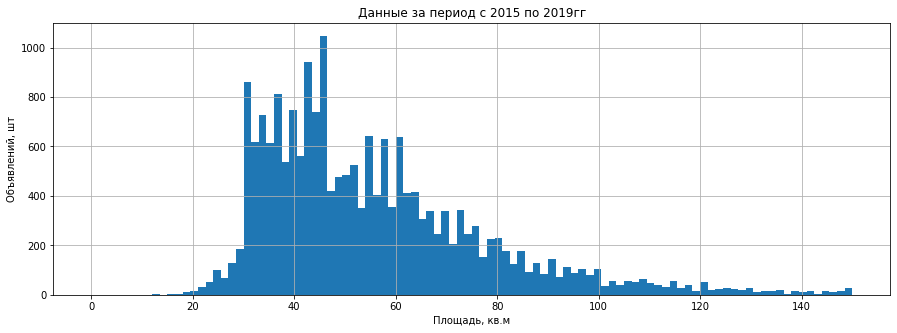

In [48]:
df.total_area.hist(bins=100, range=(0,150), figsize=(15, 5))
plt.xlabel('Площадь, кв.м')
plt.ylabel('Объявлений, шт')
plt.title(title)
#построим гистограмму значений

Как мы видим, больше всего квартир площадью 45 кв.м. Также много квартир площадью от 28 до 65 кв.м. 75% квартир имеют площадь до 67 кв.м. Это значит, что больше популярностью пользуются жильё небольшой площадью, скорее всего, на 1-2 комнаты. Ну и совсем мало квартир площадью более 100 кв.м. <a name="total_area"></a>

In [49]:
df.last_price.describe().apply('{0:.5f}'.format)

count        20331.00000
mean       6238470.87900
std       10835067.92613
min          12190.00000
25%        3400000.00000
50%        4500000.00000
75%        6500000.00000
max      763000000.00000
Name: last_price, dtype: object

Text(0.5, 1.0, 'Данные за период с 2015 по 2019гг')

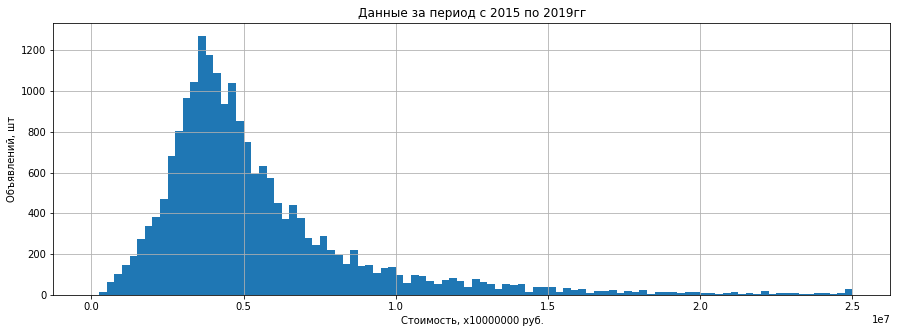

In [50]:
df.last_price.hist(bins=100, range=(0, 25000000), figsize=(15, 5))
plt.xlabel('Стоимость, х10000000 руб.')
plt.ylabel('Объявлений, шт')
plt.title(title)

Наибольшее количество объявлений с ценой около 4 млн руб. Также много значений лежит в диапазоне от 2,5 млн руб до 6 млн руб. Квартир, стоимостью более 8 млн руб. немного. 75% квартир стоят до 6,5 млн руб. <a name="price"></a>

In [51]:
df.rooms.describe()

count    20331.000000
mean         2.024052
std          1.054007
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Данные за период с 2015 по 2019гг')

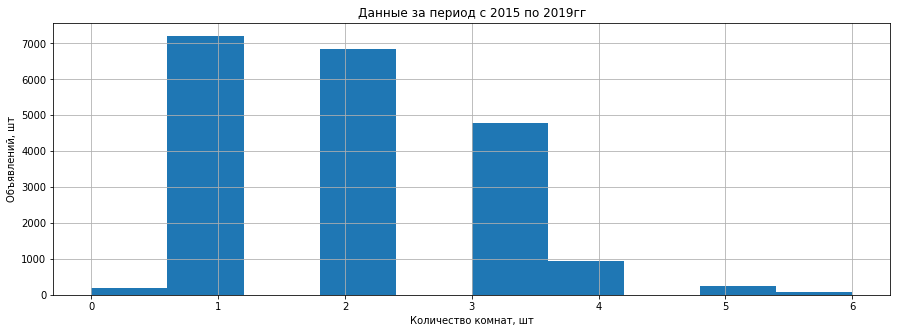

In [52]:
df.rooms.hist(range=(0,6), figsize=(15, 5))
plt.xlabel('Количество комнат, шт')
plt.ylabel('Объявлений, шт')
plt.title(title)

Больше всего 1-комнатных квартир, примерно столько же 2-комнатных. 3-комнатных чуть меньше, но он всё равно популярны. А вот квартиры с количеством комнат более 4 - уже редкое явление. <a name="rooms"></a>

In [53]:
df.ceiling_height.describe()

count    20331.000000
mean         2.784404
std          0.278560
min          1.750000
25%          2.600000
50%          2.800000
75%          2.800000
max          9.166667
Name: ceiling_height, dtype: float64

Text(0.5, 1.0, 'Данные за период с 2015 по 2019гг')

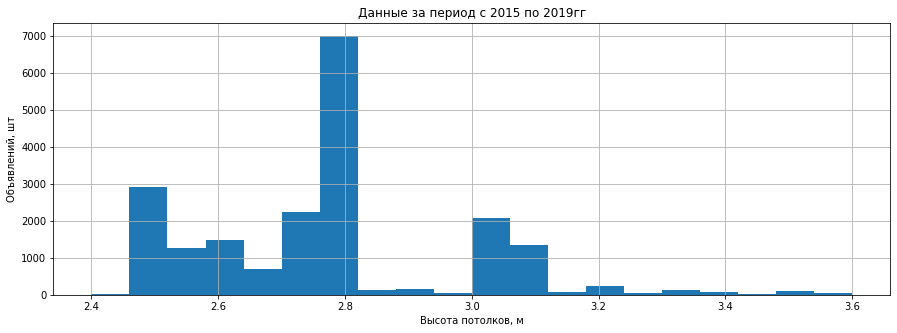

In [54]:
df.ceiling_height.hist(bins=20, range=(2.4, 3.6), figsize=(15, 5))
plt.xlabel('Высота потолков, м')
plt.ylabel('Объявлений, шт')
plt.title(title)

На этом графике мы видим распределение с одним явным пиком со значением 2,8 м и 2 малых пика 2,5 м и 3 м. Скорее всего, это связано с тем, что дома строятся по определённым ТУ. То есть, чаще строились дома с высотой потолков 2,8 м. Старые дома, скорее всего, в историческом центре было принято строить с высотой потолков 3 м. <a name="ceiling_height"></a>

In [55]:
df.days_exposition.describe()

count    20331.000000
mean       180.623875
std        219.330880
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Данные за период с 2015 по 2019гг')

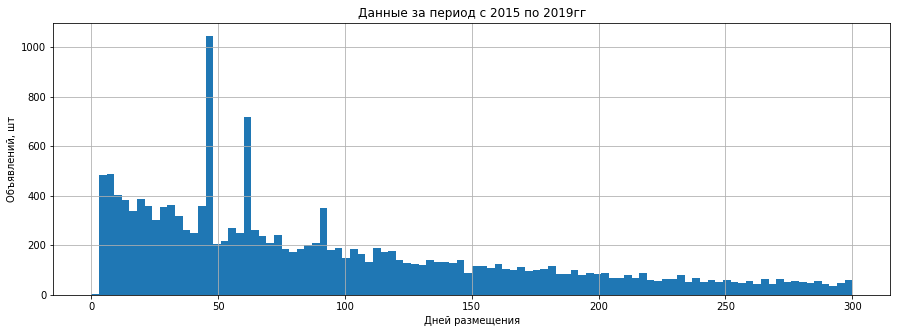

In [56]:
df.days_exposition.hist(bins=100, range=(0,300), figsize=(15, 5))
plt.xlabel('Дней размещения')
plt.ylabel('Объявлений, шт')
plt.title(title)

На графике мы видим, что два аномальных пика на 45 и 60 день. В среднем квартира продаётся за 180 дней. Но половина квартир продаётся до 95 дней. Скорее всего, такой показатель среднего из-за аномальных значений по срокам продаж очень дорогих квартир. 75% квартир продаётся до 231 дня. В принципе, можно сказать, что до 100 дней - это нормальный срок продажи квартиры, если больше - это уже долго, а если свыше 231 дня, то это необычно долго. <a name="days_exposition"></a>

In [57]:
total_area_rare = (df['total_area'].quantile(0.75) - df['total_area'].quantile(0.25)) * 1.5 + df['total_area'].quantile(0.75)
df = df.query('total_area < @total_area_rare and total_area > 20')
#Удаляю строки, значения площади которых редко встречаются и строки с аномальными значениями общей площади

In [58]:
last_price_rare = (df['last_price'].quantile(0.75) - df['last_price'].quantile(0.25)) * 1.5 + df['last_price'].quantile(0.75)
df = df.query('last_price < @last_price_rare and last_price > 1000000')

In [59]:
df = df.query('rooms >= 1') #все строки с аномально большим количеством комнат (больше 6) удалились предыдущими действиями. Этим действием я удаляю объявления, в которых количество комнат равно 0, так как вряд ли в квартире действительно нет комнат

In [60]:
df = df.query('ceiling_height < 3.6')

In [61]:
days_exposition_rare = (df['days_exposition'].quantile(0.75) - df['days_exposition'].quantile(0.25)) * 1.5 + df['days_exposition'].quantile(0.75)
df = df.query('days_exposition < @days_exposition_rare')

In [62]:
df.days_exposition.describe()

count    16247.000000
mean       120.733428
std        113.283888
min          1.000000
25%         39.000000
50%         78.000000
75%        173.000000
max        477.000000
Name: days_exposition, dtype: float64

С удалением редких и выбивающихся значений, среднее время продажи сократилось на 30%: со 180 до 120 дней, а значит, как и предполагалось, из-за выбивающихся значений среднее было завышено. Собственно, теперь можно сказать, что нормальным сроком продажи является продажа до 77 дней, долгим - до 172 дней, а свыше этого срока - необычно долгая продажа.

Изучим, как зависит цена от площади, числа комнат и удалённости от центра. Для этого оставим в таблице только эти показатели, и построим диаграммы.

In [63]:
price_square_rooms_center = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].copy()
price_square_rooms_center.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.671261,0.422603,-0.241984
total_area,0.671261,1.000000,0.803470,-0.079806
rooms,0.422603,0.803470,1.000000,-0.051654
cityCenters_nearest,-0.241984,-0.079806,-0.051654,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xl

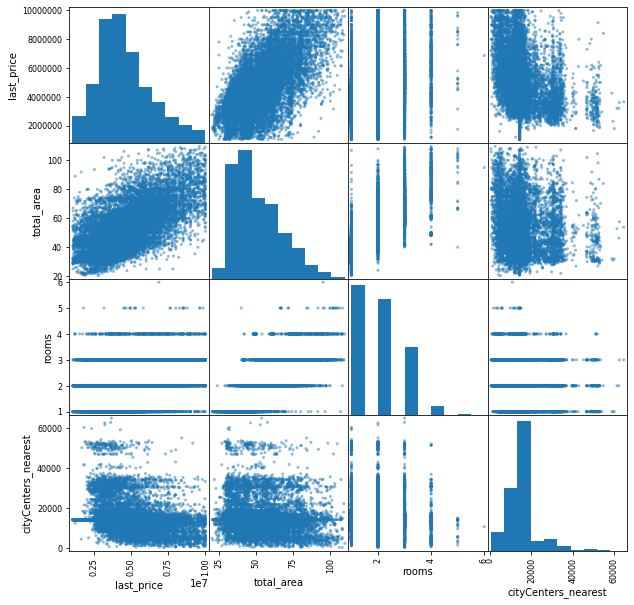

In [64]:
pd.plotting.scatter_matrix(price_square_rooms_center, figsize=(10, 10))

На графиках прослеживается зависимость стоимости от площади квартиры. Также можно сказать, что зависимость от числа комнат тоже есть, но не очень сильная, площадь оказывает более сильно влияние. Удалённость от центра не сильно влияет на стоимость квартиры. <a name="price_square_rooms_center"></a>

In [65]:
sq_metr_center = df.query('locality_name == "Санкт-Петербург"')[['last_price', 'cityCenters_nearest']].copy() #возможно, если мы выберем только объявления из Санкт-Петербурга, влияние будет больше
sq_metr_center.corr()

,last_price,cityCenters_nearest
last_price,1.000000,-0.322313
cityCenters_nearest,-0.322313,1.000000


Коэффициент корреляции изменился, но не намного.

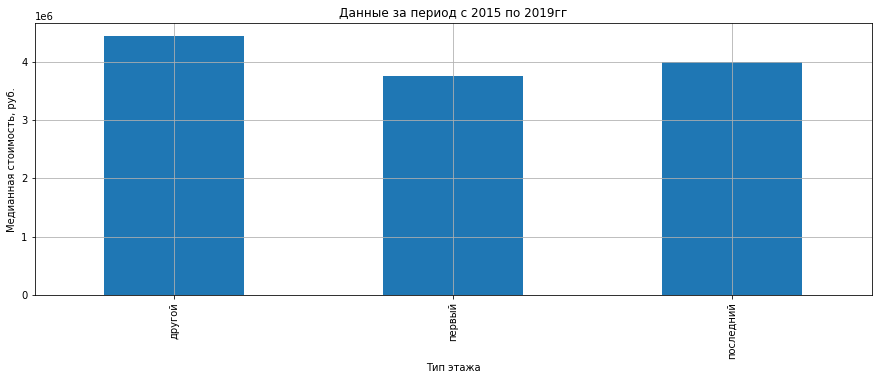

In [66]:
df.groupby('floor_type')['last_price'].median().plot(kind='bar', style='o', figsize=(15, 5), grid=True)
plt.xlabel('Тип этажа')
plt.ylabel('Медианная стоимость, руб.')
plt.title(title)
plt.show()
#изучим зависимость цены от этажа

Меньше всего стоимость квартир, расположенных на первом этаже. Квартира стоит дороже, если она находится ни на первом, ни на последнем. Это может быть связано с тем, что на первом этаже окна расположены примерно на уровне глаз прохожих, и людям некомфортно жить в таких условиях, когда любой прохожий может заглянуть в окно. Также на первом этаже нередко бывают проблемы, связанные с тем, что под полом проходят общедомовые коммуникации, и от них бывают испарения, которые негативно сказываются на состоянии жилья. На последнем этаже удешевление жилья может быть связано с тем, что не всегда лифт доходит до последнего этажа, а останавливается за один этаж до него. Также нередко случается так, что у домов протекает крыша и в квартиру попадают осадки с внешней среды. <a name="price_floor"></a>

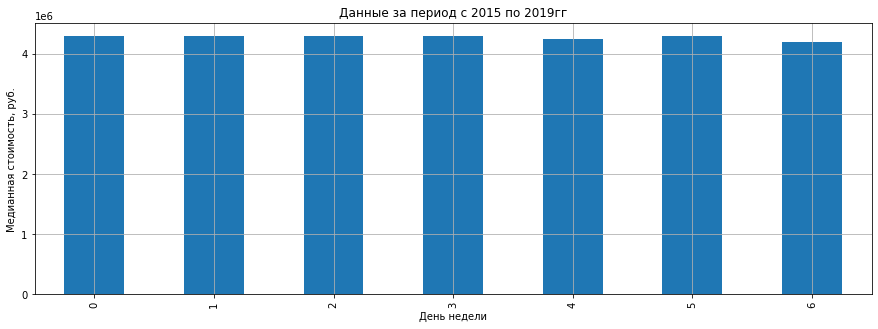

In [67]:
df.groupby('weekday')['last_price'].median().plot(kind='bar', style='o', figsize=(15, 5), grid=True)
plt.xlabel('День недели')
plt.ylabel('Медианная стоимость, руб.')
plt.title(title)
plt.show()

Как мы видим, стоимость не зависит от дня размещения. Это связано с тем, что, как мы выяснили, продажа квартиры - это небыстрый процесс, который часто длится больше месяца, а то и двух. <a name="price_weekday"></a>

In [68]:
locality_name_10 = df['locality_name'].value_counts().head(10).index.to_list()
locality_name_10
#10 населённых пунктов с наибольшим количество объявлений

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Колпино',
 'Парголово',
 'Пушкин',
 'Гатчина',
 'Выборг']

In [103]:
df_loc_10.groupby('locality_name')['sq_m_price'].mean().sort_values()

locality_name
Выборг              57419.750109
Всеволожск          66522.518440
Гатчина             68558.965246
Колпино             74482.161750
Шушары              77473.627591
Мурино              85367.508268
Парголово           89387.272247
Кудрово             94157.216484
Пушкин              99049.460343
Санкт-Петербург    103300.657617
Name: sq_m_price, dtype: float64

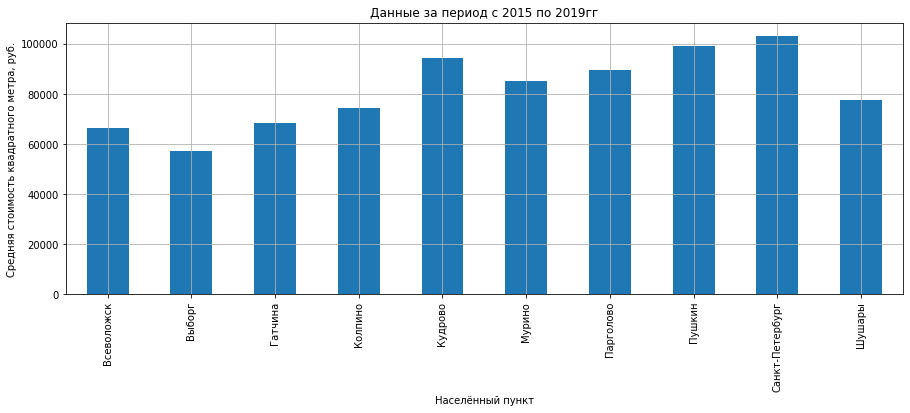

In [116]:
df_loc_10 = df.query('locality_name in @locality_name_10')
df_loc_10.groupby('locality_name')['sq_m_price'].mean().plot(kind='bar', style='o', figsize=(15, 5), grid=True)
plt.xlabel('Населённый пункт')
plt.ylabel('Средняя стоимость квадратного метра, руб.')
plt.title(title)
plt.show()

Самая большая цена квадратного метра в Санкт-Петербурге, потому что это столица региона. Не намного меньше цена в Пушкине. Здесь, скорее всего, сыграли роль 2 фактора: относительная близость к Санкт-Петербургу (из Пушкина до ближайшей станции метро можно добраться на общественном транспорте буквально за 20-30 минут) и наличие исторических достопримечательностей. С Царским Селом в истории Россииской Империи много всего связано.
Наиболее низкая цена квадратного метра в Выборге. <a name="price_locality"></a>

In [70]:
df_loc_10_pt = df_loc_10.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'mean']).reset_index()
df_loc_10_pt.columns = ['Наименование населённого пункта', 'Количество объявлений, шт', 'Средняя цена кв. метра, руб.']
df_loc_10_pt.sort_values(by='Средняя цена кв. метра, руб.', ascending=False)

,Наименование населённого пункта,"Количество объявлений, шт","Средняя цена кв. метра, руб."
8,Санкт-Петербург,10387,103300.657617
7,Пушкин,251,99049.460343
4,Кудрово,379,94157.216484
6,Парголово,278,89387.272247
5,Мурино,484,85367.508268
9,Шушары,373,77473.627591
3,Колпино,288,74482.161750
2,Гатчина,238,68558.965246
0,Всеволожск,294,66522.518440
1,Выборг,180,57419.750109


In [71]:
df_spb = df.query('locality_name == "Санкт-Петербург"') #оставим таблицу только по квартирам в Санкт-Петербурге

In [72]:
df_spb['cityCenters_nearest'] = df_spb['cityCenters_nearest'].apply(lambda x: x / 1000).astype('int') #округляем значения расстояния до центра до километров
df_spb['cityCenters_nearest'].describe()

count    10387.000000
mean        12.046886
std          4.343478
min          0.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest, dtype: float64

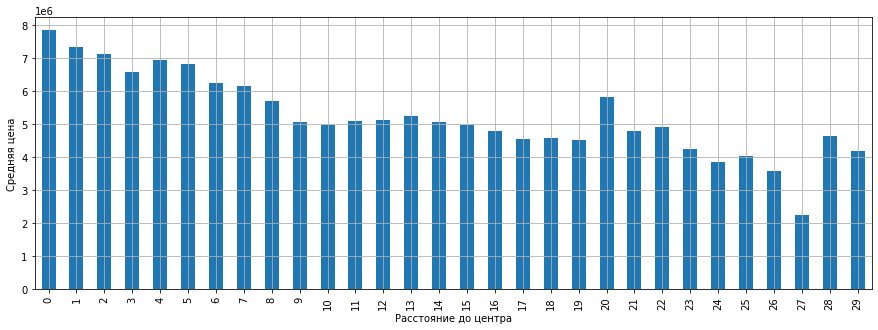

In [73]:
df_spb.groupby('cityCenters_nearest')['last_price'].mean().plot(kind='bar', style='o', figsize=(15, 5), grid=True)
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя цена')
plt.show()

Средняя цена квартиры, в основном, уменьшается при отдалении от центра. Сильно выделяются 20й километр и 27й. На 20м километре средняя цена резко увеличивается, на на 27м резко снижается. Граница центра условно проходит по 8му километру. До 9го километра цена, в основном, снижается, а с 9го километра на протяжении нескольких километров находится примерно на одном уровне. <a name="price_center"></a>

In [74]:
df_spb_center = df_spb.query('cityCenters_nearest <= 8') #создаю таблицу с квартирами в центре Санкт-Петербурга

In [75]:
df_spb_center.total_area.describe() #исследуем общую площадь квартир в центре

count    1912.000000
mean       59.008609
std        18.802638
min        20.300000
25%        44.100000
50%        56.900000
75%        72.000000
max       109.700000
Name: total_area, dtype: float64

In [76]:
df_spb.total_area.describe() #исследуем общую площадь квартир в СПб

count    10387.000000
mean        51.941109
std         16.457174
min         20.300000
25%         39.200000
50%         48.000000
75%         62.000000
max        109.700000
Name: total_area, dtype: float64

<AxesSubplot:>

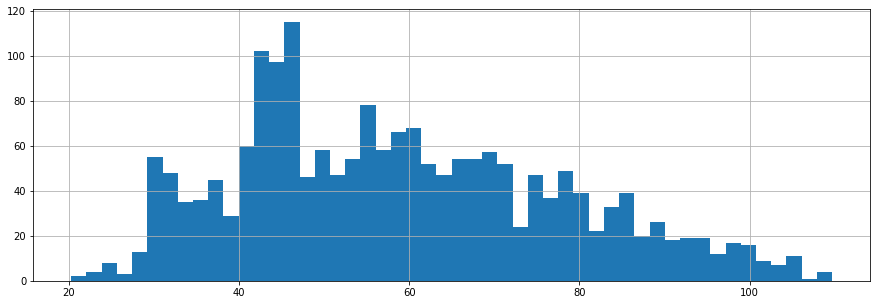

In [77]:
df_spb_center.total_area.hist(bins=50, figsize=(15, 5)) #построим гистограмму значений

<AxesSubplot:>

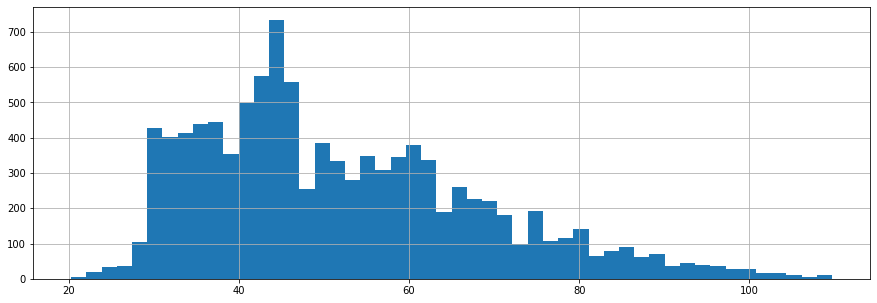

In [78]:
df_spb.total_area.hist(bins=50, figsize=(15, 5)) #построим гистограмму значений

Как мы видим, в центре больше всего квартир площадью 45 кв.м, как и в Санкт-Петербурге. В Центре вартиры площадью от 40 до 80 кв.м примерно все на одном уровне распространённости, за исключением квартир от 42 до 45 кв.м и квартир площадью 75 кв. м. В СПБ же больше распространены квартиры площадью от 30 до 60 кв. м. 75% квартир центра имеют площадь до 72 кв.м, в СПб этот показатель равен 62. В центре площадь квартир больше, чем в целом по городу. <a name="spb_center"></a>

In [79]:
df_spb_center.last_price.describe().apply('{0:.5f}'.format)

count        1912.00000
mean      6489036.53138
std       1847251.01657
min       1600000.00000
25%       5099750.00000
50%       6500000.00000
75%       7956500.00000
max      10000000.00000
Name: last_price, dtype: object

In [80]:
df_spb.last_price.describe().apply('{0:.5f}'.format)

count       10387.00000
mean      5273675.00414
std       1724999.30660
min       1200000.00000
25%       3950000.00000
50%       4900000.00000
75%       6350000.00000
max      10000000.00000
Name: last_price, dtype: object

<AxesSubplot:>

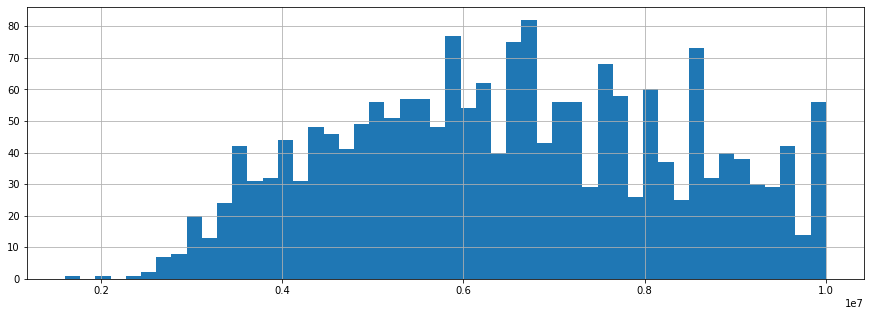

In [81]:
df_spb_center.last_price.hist(bins=50, figsize=(15, 5))

<AxesSubplot:>

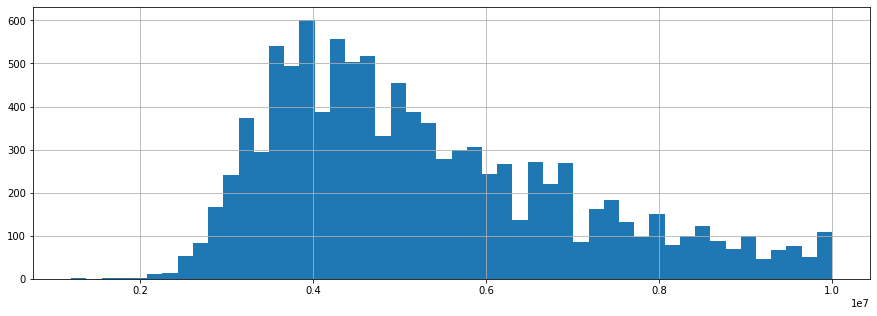

In [82]:
df_spb.last_price.hist(bins=50, figsize=(15, 5))

Наибольшее количество объявлений в центре с ценой около 7 млн руб. За пределами центра - окло 4 млн рублей. Квартиры стоимостью свыше 4 млн рублей в центре примерно одинаково распространены, то есть нет какого чёткого убывания популярности цены. За пределами центра после цены в 4 млн идёт практически чёткое падение популярности, то есть, чем выше цена, тем меньше объявлений. 75% квартир центра стоят до 8 млн руб. За переделами 75% квартир стоимостью до 6,35 млн рублей. Значит, что квартиры в центре в целом значительно дороже и, в целом, больше более дорогих квартир.

In [83]:
df_spb_center.rooms.describe()

count    1912.000000
mean        2.126046
std         0.884965
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

In [84]:
df_spb.rooms.describe()

count    10387.000000
mean         1.898816
std          0.862078
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:>

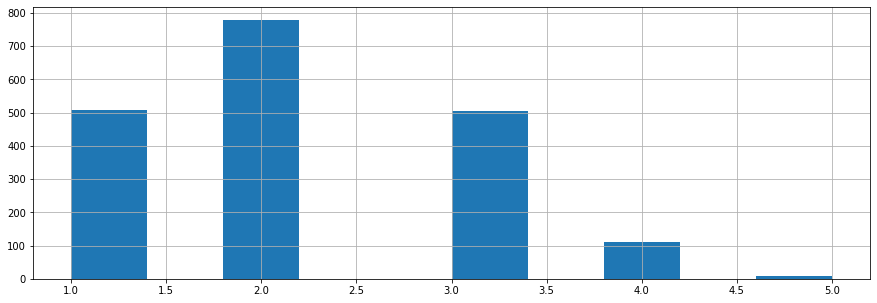

In [85]:
df_spb_center.rooms.hist(figsize=(15, 5))

<AxesSubplot:>

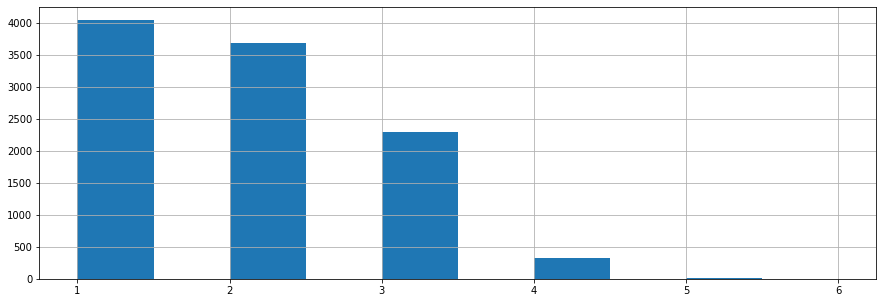

In [86]:
df_spb.rooms.hist(figsize=(15, 5))

В центре больше популярны 2-комнатные квартиры, а 1- и 3-комнатные примерно на одном уровне популярности. За пределами центра в СПб больше популярностью пользуются 1-комнатные квартиры, а с увеличением числа комнат количество объявлений падает. В среднем, в центре города квартиры с большим количеством комнат, чем на окраинах.

In [87]:
df_spb_center.ceiling_height.describe()

count    1912.000000
mean        2.967657
std         0.236670
min         2.400000
25%         2.800000
50%         3.000000
75%         3.100000
max         3.590000
Name: ceiling_height, dtype: float64

In [88]:
df_spb.ceiling_height.describe()

count    10387.000000
mean         2.763047
std          0.203249
min          1.750000
25%          2.600000
50%          2.800000
75%          2.800000
max          3.590000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

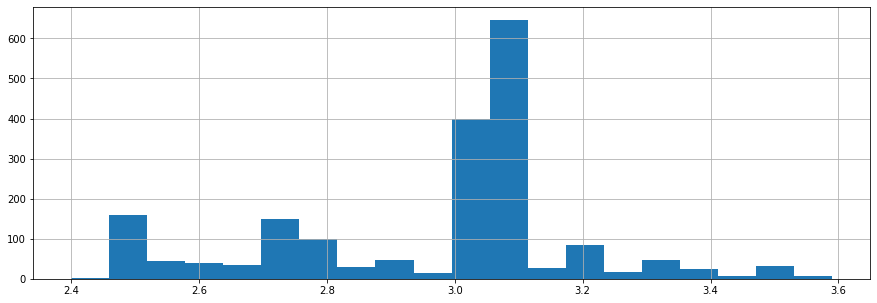

In [89]:
df_spb_center.ceiling_height.hist(bins=20, figsize=(15, 5))

<AxesSubplot:>

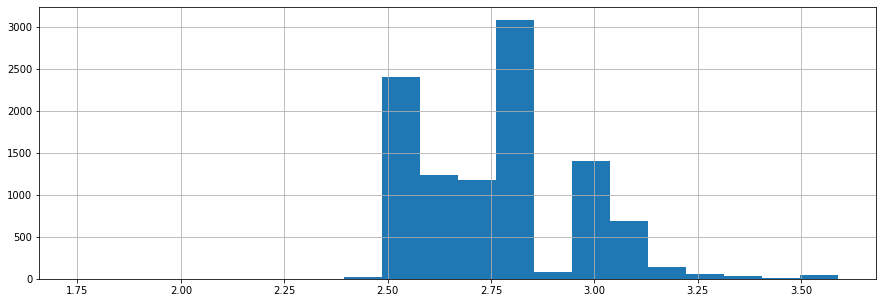

In [90]:
df_spb.ceiling_height.hist(bins=20, figsize=(15, 5))

В центре больше объявлений с потолками высотой 3 и 3,1 метров. Остальные примерно одинаково мало распространены. На окраинах больше популярны квартиры с высотой потолков 2,8 и 2,5 метра. Менее популярны 3м. В среднем, в центре Санкт-Петербурга высота потолков в квартирах выше, чем на окраинах.

In [91]:
spb_center_rooms_floor_center_date = df_spb_center[['last_price', 'rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition']].copy()
spb_center_rooms_floor_center_date.corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.455718,0.096273,-0.260141
rooms,0.455718,1.000000,-0.195535,-0.203629
floor,0.096273,-0.195535,1.000000,0.257625
cityCenters_nearest,-0.260141,-0.203629,0.257625,1.000000


In [92]:
spb_rooms_floor_center_date = df_spb[['last_price', 'rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition']].copy()
spb_rooms_floor_center_date.corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.491660,0.074112,-0.321268
rooms,0.491660,1.000000,-0.201549,-0.126505
floor,0.074112,-0.201549,1.000000,0.203649
cityCenters_nearest,-0.321268,-0.126505,0.203649,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='floor'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='floor', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='city

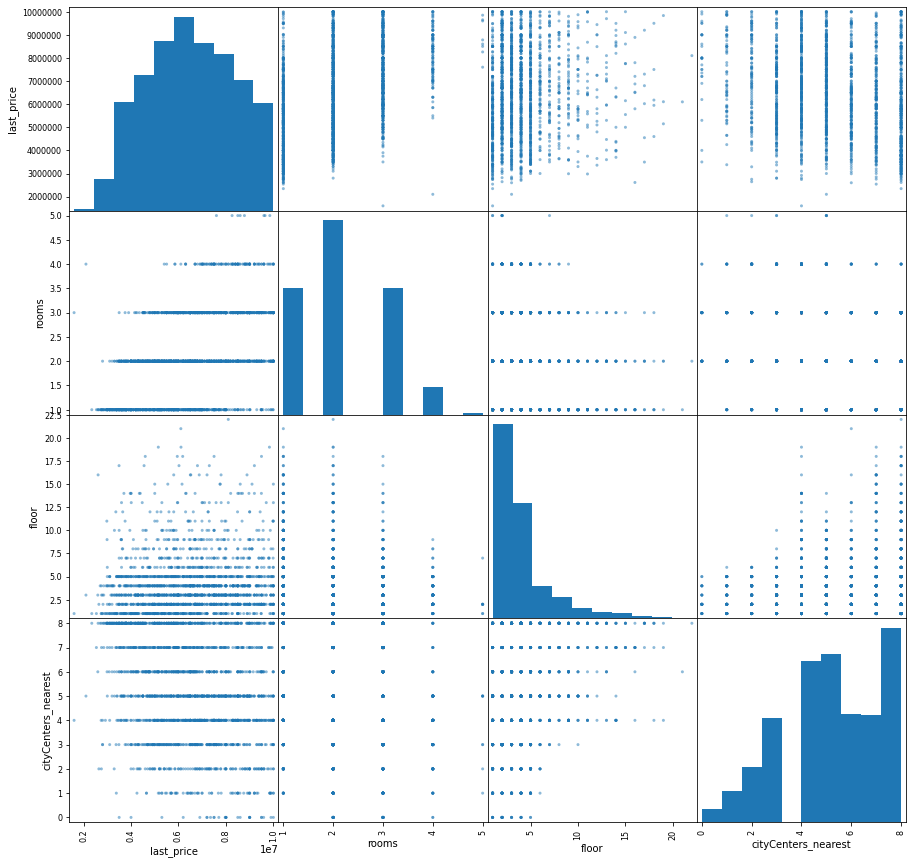

In [93]:
pd.plotting.scatter_matrix(spb_center_rooms_floor_center_date, figsize=(15, 15))

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='floor'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='floor', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='city

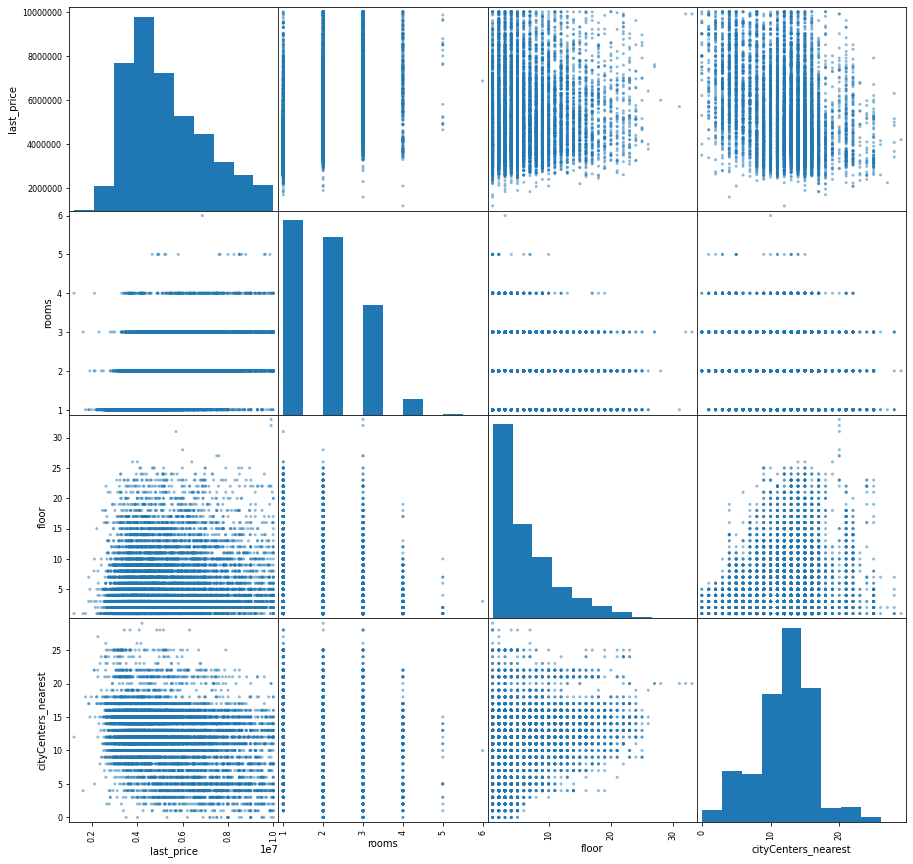

In [94]:
pd.plotting.scatter_matrix(spb_rooms_floor_center_date, figsize=(15, 15))

Цена квартир в центре никак не зависит от этажа, немного зависит от удалённости от центра, чуть более зависит от количества комнат. На окраинах СПб картина такая же.

[В начало](#step6)

### Шаг 5. Вывод <a name="step5"></a>

Исследуя данные объявлений о продаже квартир, установил, что цена квартир зависит от:
1. общей площади квартиры: зависимость прямая и сильная, с увеличением площади растёт цена квартиры 
2. количества комнат: зависимость прямая, но не очень сильная
3. этажа: на первом и последнем этажах квартиры дешевле
4. населённого пункта: самая высокая цена за квадратный метр в Санкт-Петербурге, Пушкине и Кудрово. Дешевле всего квадратный метр в Гатчине, Всеволожске и Выборге.
В самом же Санкт-Петербурге цена квартиры зависит от удалённости от центра. Центральная зона находится в радиусе 8 км центра Санкт-Петербурга. Разница между квартирами в центре и на окраинах не только в цене, но и в самих квартирах: в центре Санкт-Петербурга квартиры большей площадью, с большей высотой потолков и большим количеством комнат. И сама динамика цен различная: за пределами центральной зоны Санкт-Петербурга пиковое значение цены 4 млн, и далее, с увеличением цены количество объявлений значительно уменьшается. В центральной зоне увеличение цены практически не оказывает влияние на количество объявлений, а наиболее распространённая цена - 7млн рублей, практически в 2 раза больше наиболее распространённой цены за пределами центральной зоны.
Все эти параметры нужно закладывать в автоматизированную систему отслеживания аномалий и мошеннической деятельности.

[В начало](#step6)